# Imports

In [61]:
#Displaying and importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling
from imblearn.over_sampling import SMOTE

# Classification
from sklearn.metrics import balanced_accuracy_score

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [62]:
### Importing the data

In [63]:
X_train =  pd.read_csv("X_train.csv",delimiter=",", index_col='id')
y_train = pd.read_csv("y_train.csv",delimiter=",", index_col='id')

X_test =  pd.read_csv("X_test.csv", delimiter=",", index_col='id')

X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-0.403221,0.220492,1.106921,0.068664,0.279619,0.388415,0.236717,-0.152921,0.432778,-0.752647,...,0.673128,-0.444427,0.448460,-0.693521,0.540356,-0.729529,0.395605,0.440266,1.240888,0.937046
std,0.663232,0.764817,0.794665,0.888101,0.690293,0.628839,0.625738,0.782704,0.568082,0.573664,...,0.866030,0.706408,0.786608,1.033146,0.707031,0.729511,0.584042,0.574004,0.668117,0.884328
min,-3.026434,-2.177817,-0.993103,-2.958118,-1.992190,-2.229151,-1.620785,-3.842304,-2.046807,-3.980367,...,-1.351814,-3.587288,-2.027416,-4.932804,-1.548640,-3.720113,-1.686527,-2.076105,-1.547162,-1.861970
25%,-0.827374,-0.306275,0.518833,-0.604431,-0.180091,-0.002606,-0.188781,-0.681943,0.096057,-1.084700,...,0.027572,-0.854477,-0.152561,-1.446615,0.039625,-1.209385,0.012024,0.107948,0.773387,0.276949
50%,-0.312958,0.084477,0.933785,-0.061674,0.199699,0.357911,0.147484,-0.049152,0.409125,-0.696674,...,0.473798,-0.344868,0.325952,-0.603889,0.457354,-0.640468,0.335444,0.454828,1.138441,0.752086
75%,0.076125,0.624882,1.585165,0.737608,0.644108,0.753130,0.612462,0.409195,0.752769,-0.361554,...,1.246985,0.048537,0.971055,0.111399,0.978256,-0.192801,0.727108,0.792661,1.625235,1.549565
max,1.769423,4.102255,4.946383,3.461174,3.682944,3.209605,3.303836,2.223731,3.235681,0.823849,...,5.333272,1.840349,3.701539,2.378358,3.393483,2.271806,3.589027,2.841595,5.489396,4.947546


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4800 entries, 0.0 to 4799.0
Columns: 1000 entries, x0 to x999
dtypes: float64(1000)
memory usage: 36.7 MB


##### No value has std=0 and no null values per row

Series([], dtype: float64)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


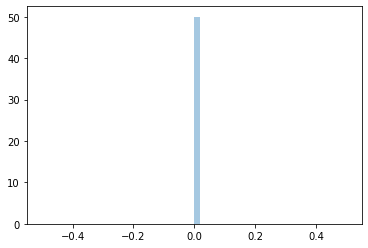

In [65]:
print(X_train.std()[X_train.std() == 0])
is_null_row = X_train.isnull().sum(axis=1)
is_null_row.sort_values(inplace=True, ascending=False)
sns.distplot(np.asarray(is_null_row))

### Data balancing : Equilibrating classes

In [66]:
def display_freq(y_train):
    sns.distplot(y_train)
    plt.ylabel('Frequency')
    plt.title('Count')

    plt.show()
    print(sum(y_train['y']==0))
    print(sum(y_train['y']==1))
    print(sum(y_train['y']==2))

##### Downsampling

##### Upsampling

##### Resampling using SMOTE

Before SMOTE : 


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


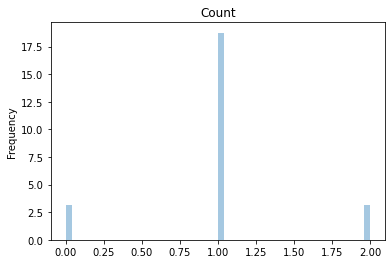

600
3600
600
After SMOTE : 


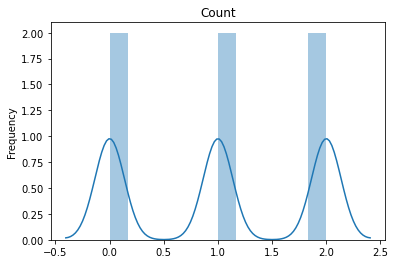

3600
3600
3600


In [67]:
sm = SMOTE()

print("Before SMOTE : ")
display_freq(y_train)

x_train, y_train = sm.fit_resample(X_train, y_train)

print("After SMOTE : ")
display_freq(y_train)

### Outlier detection

##### Outlier detection try failed lmao j'y comprend pas grand chose

Train shape before cleaning :  (10800, 1000)
Train shape after cleaning :  (3600, 1000)


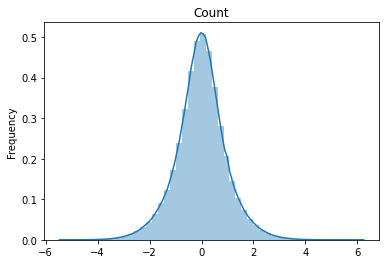

0
3600
0


In [68]:
def cleanXydata(X_train, y_train):
    x_train =  X_train.fillna(X_train.median())
    
    #refill id
    y_train.columns = ["y"]
    y_train["id"] = y_train.index
    y_train = y_train[["id", "y"]]
    x_train["id"] = x_train.index

    train_data = pd.merge(left=x_train, right=y_train, how='inner').drop(columns=['id'])

    types = train_data['y'].unique()
    d = {type : train_data[train_data['y'] == type] for type in types}

    # Set the quantile
    low = .25
    high = .75

    bounds = {}
    for type in types:
        filt_df = d[type].loc[:, d[type].columns != 'Type'] # Remove 'Type' Column
        quant_df = filt_df.quantile([low, high])
        IQR = quant_df.iloc[1,:]-  quant_df.iloc[0,:]
        quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
        quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
        bounds[type] = quant_df


    # Define our new dataset by removing the outliers 
    filt_df = d[1].loc[:, d[1].columns != 'y'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
    filt_df = pd.concat([filt_df,d[1].loc[:,'y']], axis=1)
    filt_df = filt_df.fillna(filt_df.median())
    
    return filt_df.drop(columns=['y']), filt_df

print("Train shape before cleaning : ", x_train.shape)
x_train,y_train = cleanXydata(x_train, y_train)
print("Train shape after cleaning : ", x_train.shape)
display_freq(y_train)

### Feature Selection

### Multiclass classification starts here

In [73]:
# divide datasets
## don't forget to drop y if its still there
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=5)
print("Train shape : " , x_train.shape)
print("Test shape : ",x_test.shape)

Train shape :  (2412, 1000)
Test shape :  (1188, 1000)


##### Support Vector classification

In [20]:
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(x_train, y_train)
y_train_pred_svm = svm_classifier.predict(x_train)
y_test_pred_svm = svm_classifier.predict(x_test)

print(balanced_accuracy_score(y_test, y_test_pred_svm))

##### One-Vs-The-Rest classification (multiclass learning), LinearSVC

In [ ]:
oneVsRest_classifier = OneVsRestClassifier(LinearSVC(random_state=0,max_iter=50000))
oneVsRest_classifier.fit(x_train, y_train)
y_train_pred_1vr = oneVsRest_classifier.predict(x_train)
y_test_pred_1vr = oneVsRest_classifier.predict(x_test)

print(balanced_accuracy_score(y_test, y_test_pred_1vr))

##### OneVsRest using XGBoost

In [ ]:
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(x_train,y_train)
y_train_pred_dnn = dnn_classifier.predict(x_train)
y_test_pred_dnn = dnn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_dnn))

##### One-Vs-One classification

In [11]:
oneVsOne_classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=10000))
oneVsOne_classifier.fit(x_train, y_train)
y_train_pred_1v1 = oneVsOne_classifier.predict(x_train)
y_test_pred_1v1 = oneVsOne_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_1v1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9403906417086855


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### Error-Correcting Output-Codes

In [12]:
code_classifier = OutputCodeClassifier(LinearSVC(random_state=0,max_iter=10000),code_size=2,random_state=0)
code_classifier.fit(x_train,y_train)
y_train_pred_code = code_classifier.predict(x_train)
y_test_pred_code = code_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_code))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9258839607709146


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### KNN Classifier

In [13]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_train_pred_knn = knn_classifier.predict(x_train)
y_test_pred_knn = knn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_knn))

0.8486473403921186


##### Random Forest

In [14]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_train_pred_rf = rf_classifier.predict(x_train)
y_test_pred_rf = rf_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_rf))

0.8897537231932082


### Multilayer Perceptron network

In [15]:
snn_classifier = MLPClassifier()
snn_classifier.fit(x_train,y_train)
y_train_pred_snn = snn_classifier.predict(x_train)
y_test_pred_snn = snn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_snn))

0.9516270239160675


### Deep Neural Network

In [16]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(x_train,y_train)
y_train_pred_dnn = dnn_classifier.predict(x_train)
y_test_pred_dnn = dnn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_dnn))

0.9488746235549308


### Outputting results

In [21]:
y_test_predict = svm_classifier.predict(X_test)

y_test_df = pd.DataFrame(data=y_test_predict)

#y_test_df = pd.DataFrame(data=y_nnet_test)
y_test_df.columns = ["y"]
y_test_df["id"] = y_test_df.index
y_test_df = y_test_df[["id", "y"]]

print(y_test_df.min())
print(y_test_df.max())

y_test_df.to_csv("y_predict_sub3.csv", index=False)

id    0
y     0
dtype: int64
id    4099
y        2
dtype: int64
